In [184]:
import numpy as np
import matplotlib.pyplot as plt

c = 3e8 # Speed of light

N_wavelengths = 100 # Number of wavelengths to consider
N_tau = 100000 # Number of time delays to consider

wavelengths = np.linspace(400e-9, 700e-9, N_wavelengths) # Wavelengths to consider
frequencies = c / wavelengths # Corresponding frequencies to consider
angular_frequencies = 2 * np.pi * frequencies # Corresponding angular frequencies to consider

displacement_step = 50e-9 # How much we move the mirror each time along one of the arms
optical_path_length_diff = 2 * displacement_step # The corresponding optical path length difference for a displacement step
displacement_steps = np.arange(N_tau) * displacement_step # Set of displacement steps to consider
optical_path_length_diffs = 2 * displacement_steps # Corresponding optical path length differences for each displacement step
tau_vals = optical_path_length_diffs / c # Corresponding time delays for each optical path length difference

f_nyquist = 2 * max(frequencies) # Sampling rate
T_nyquist = 1 / f_nyquist # Sampling period
ideal_displacement_step = (c / f_nyquist) / 2 # Ideal displacement step for the Nyquist sampling rate

# Print statements for debugging and understanding
print("The appropriate displacement step is ", ideal_displacement_step)
print("The actual displacement step is ", displacement_step)

def I(tau):
    I = 0
    for w in angular_frequencies:
        E = 1 + np.exp(1j * w * tau) # Electric field
        I += np.abs(1 + E)**2 # Intensity
    return I

The appropriate displacement step is  1e-07
The actual displacement step is  5e-08


In [185]:
I_vals = np.zeros(len(tau_vals)) # Array to store the intensity values
i=0
for tau in tau_vals:
    I_vals[i] = I(tau) # Calculate the intensity for each time delay
    i+=1

print(I_vals)
print(len(I_vals))

[900.         652.38819312 241.49774358 ... 498.65044771 476.69852236
 482.35633039]
100000


In [186]:
fft_intensity = np.fft.fft(I_vals) # Perform the FFT on the intensity values
fft_freqs = np.fft.fftfreq(len(fft_intensity), tau_vals[1] - tau_vals[0]) # Get the corresponding frequencies for the FFT
positive_freqs = fft_freqs[fft_freqs > 0] # Get the positive frequencies
positive_fft_intensity = np.abs(fft_intensity[fft_freqs > 0]) # Get the FFT intensity values for the positive frequencies

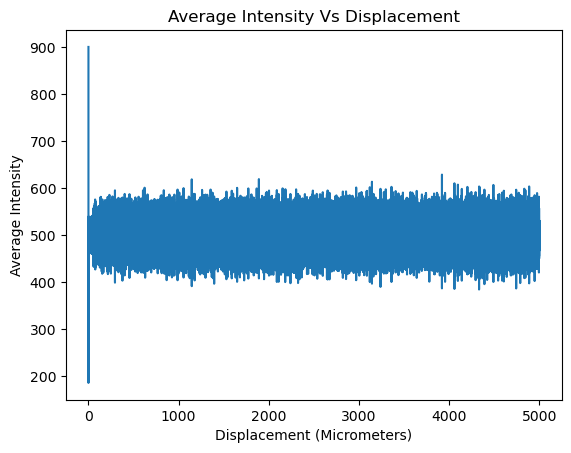

In [187]:
plt.plot(displacement_steps * 1e6, I_vals) # Plot the intensity values against the displacement steps
plt.title("Average Intensity Vs Displacement")
plt.xlabel("Displacement (Micrometers)")
plt.ylabel("Average Intensity")
plt.show()

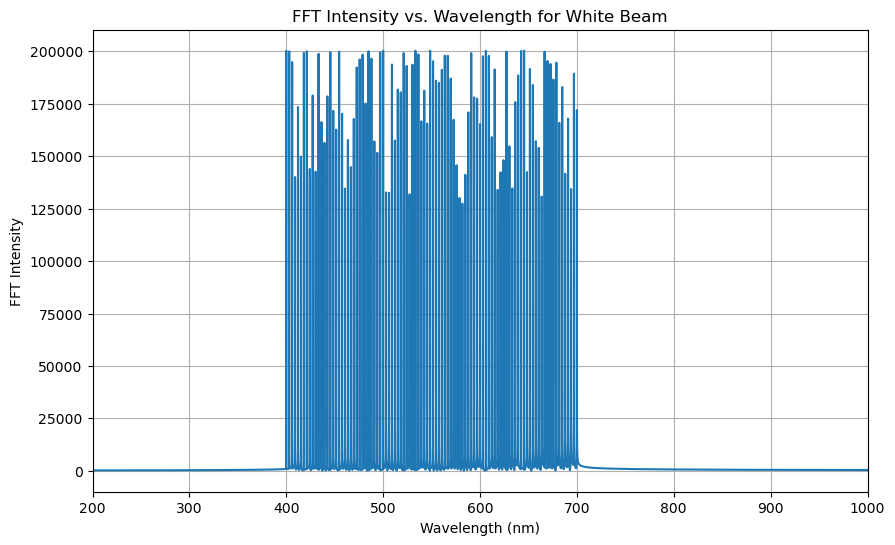

In [188]:
# Convert frequencies to wavelengths and plot
fft_wavelengths = c / positive_freqs # Convert FFT frequencies to wavelengths
plt.figure(figsize=(10, 6))
plt.plot(fft_wavelengths * 1e9, positive_fft_intensity)  # Convert wavelengths to nm and plot
plt.title('FFT Intensity vs. Wavelength for White Beam')
plt.xlabel('Wavelength (nm)')
plt.ylabel('FFT Intensity')
#plt.xlim([300, 900])
plt.xlim([200, 1000])
plt.grid()
plt.savefig('fft_intensity_vs_wavelength.png', dpi=300)  # Save the figure
plt.show()

In [ ]:
P = 